#INFO204 Assignment
---
*Jackson Kerr | 2942576*



##Gettin That Data:
Let's start by importing the modified boston data.



In [8]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

bost = pd.read_csv(io.BytesIO(uploaded['modified_boston.csv']), index_col=0)
bost

Saving modified_boston.csv to modified_boston (1).csv
User uploaded file "modified_boston.csv" with length 48485 bytes


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,11.292897
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,15.113707
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,26.034624
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,29.201223
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,24.099477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,12.242679
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,17.066060
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,11.036473
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,13.672169


####Layout:

From [cs.toronto.edu](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

| Variable | Explaination|
|----------|-------------|
| CRIM     | per capita crime rate by town |
| ZN       | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS    | proportion of non-retail business acres per town. |
| CHAS     | Charles River dummy var (1 if tract bounds river; 0 otherwise) |
| NOX      | nitric oxides concentration (parts per 10 million) |
| RM       | average number of rooms per dwelling |
| AGE      | proportion of owner-occupied units built prior to 1940 |
| DIS      | weighted distances to five Boston employment centres |
| RAD      | index of accessibility to radial highways |
| TAX      | full-value property-tax rate per \$10,000 |
| PTRATIO  | pupil-teacher ratio by town |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT    | % lower status of the population |
| MEDV     | Median value of owner-occupied homes in $1000's |

Let's have a look at the fields.

In [9]:
bost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


Looks simple. No missing values. All float64 decimal numbers.

## Exploratory Data Analysis
Examining the obvious.

Let's look at the relationships between the variables using hue="chas" as it's the only categorical variable.

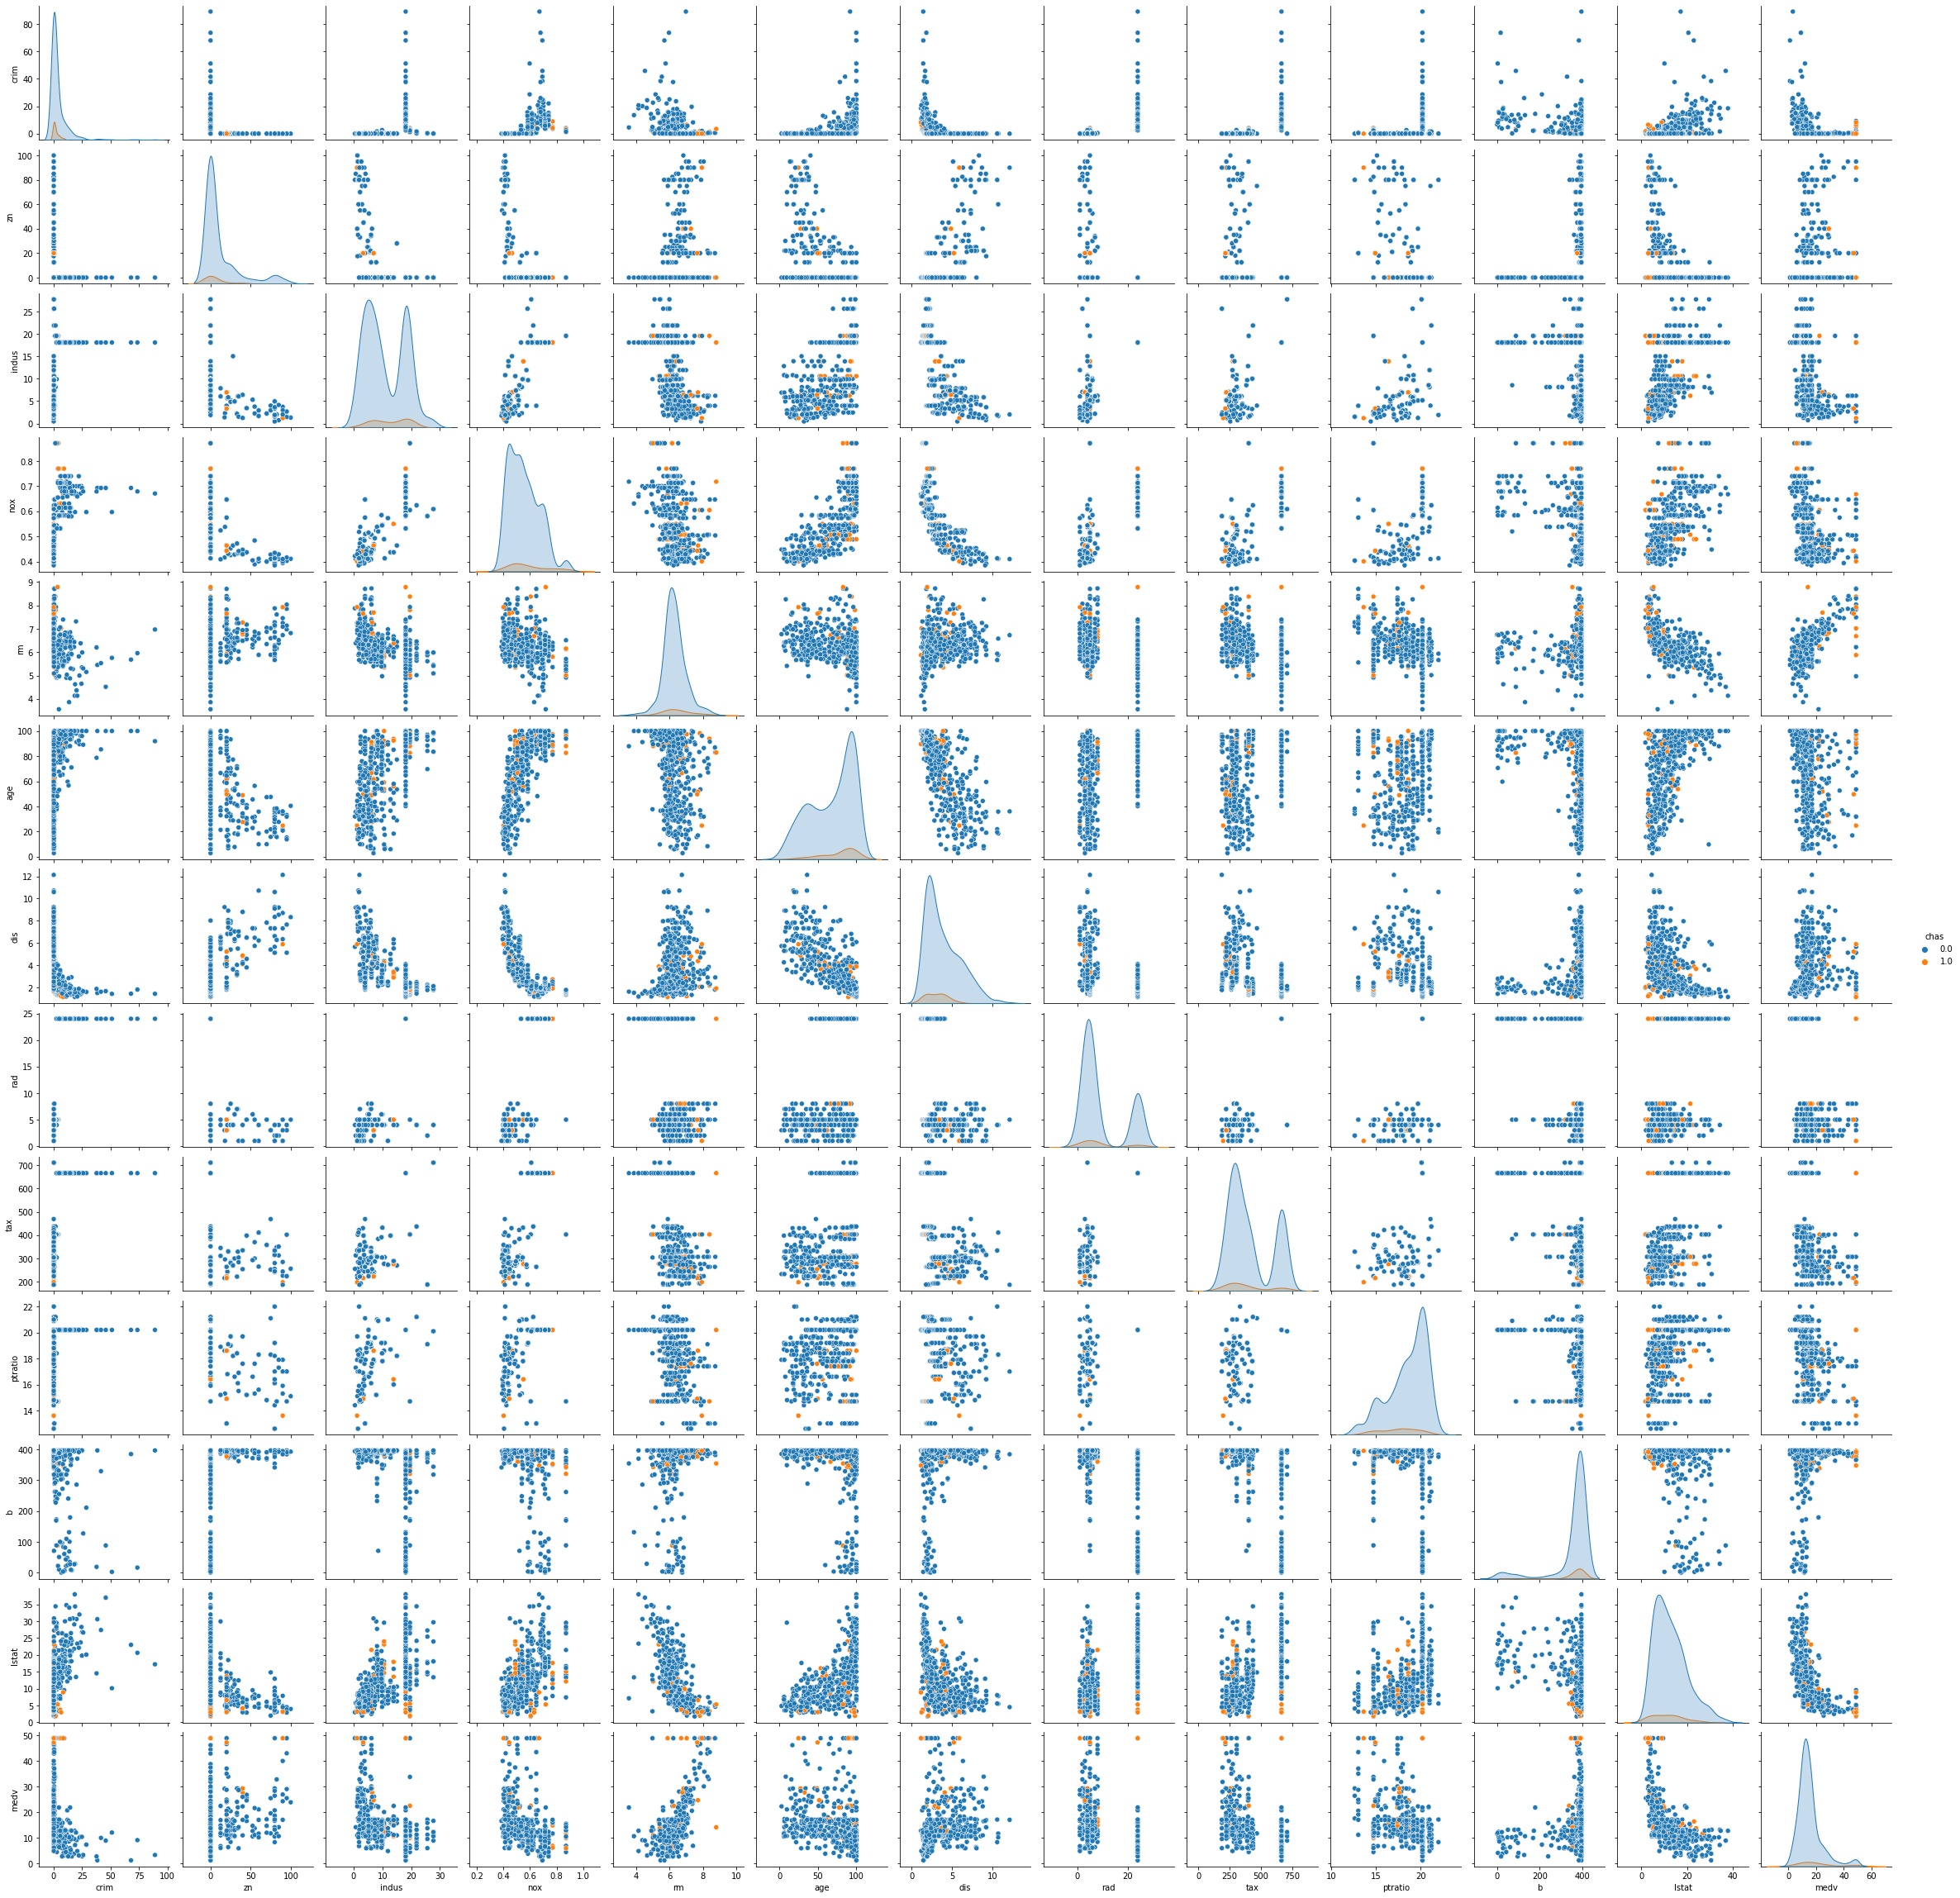

In [10]:
import seaborn as sns

sns.pairplot(bost, hue="chas")

### Notes:
- There doesen't seem to be any meaningful grouping going on with the CHAS variable.
- RM and LSTAT seem to be the strongest indicators of MEDV
- There aren't any strong linear relationships between any of the variables.
- There appears to a non-linear relationship between:
  - RM and LSTAT
  - RM and MEDV
  - LSTAT and MEDV
  - DIS and NOX

In [11]:
bost.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,15.606038
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.480268
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,1.134841
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,10.492041
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,13.099290
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,16.967099
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,48.819313


Some notes:
- Standard deviation is not uniform (or close to uniform) across all variables meaning some may need to be scaled for some models.

In [12]:
# TESTING todo remove

#sns.scatterplot(x=bost["rm"], y=bost["lstat"])
#sns.scatterplot(x=bost["rm"], y=bost["medv"])
#sns.scatterplot(x=bost["lstat"], y=bost["medv"])
#sns.scatterplot(x=bost["dis"], y=bost["nox"])
#sns.heatmap(bost.corr())